zadanie 2.1


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [12]:
def model(z, t):
    u = 1
    z1 = z[0]
    z2 = z[1]
    
    dz1dt = z1 * np.log(z2)
    dz2dt = -z2 * np.log(z1) + z2 * u
    
    return [dz1dt, dz2dt]

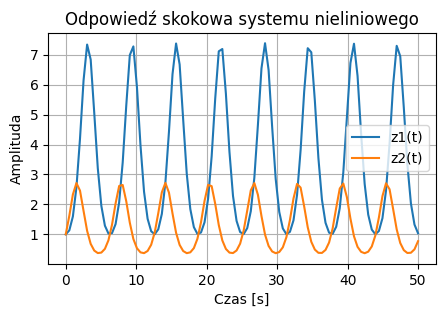

In [13]:
t = np.linspace(0, 50, 100)
z0 = np.array([1, 1])

sol = odeint(model, z0, t)
z1 = sol[:, 0]
z2 = sol[:, 1]

plt.figure(figsize=(5, 3))
plt.plot(t, z1, label='z1(t)')
plt.plot(t, z2, label='z2(t)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.title('Odpowiedź skokowa systemu nieliniowego')
plt.grid(True)
plt.legend()
plt.show()

zadanie 2.2


In [14]:
def model2(x, t):
    u = 1
    x1 = x[0]
    x2 = x[1]
    
    dx1dt = x2
    dx2dt = -x1 + u
    
    return [dx1dt, dx2dt]

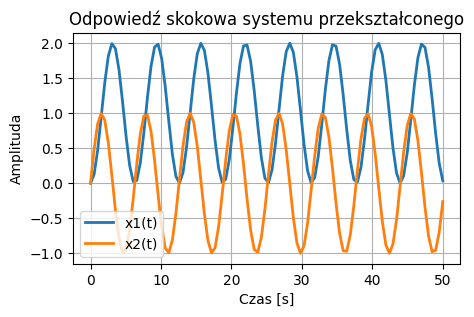

In [15]:
t = np.linspace(0, 50, 100)
x0 = np.array([0, 0])

sol = odeint(model2, x0, t)

x1 = sol[:, 0]
x2 = sol[:, 1]

plt.figure(figsize=(5, 3))
plt.plot(t, x1, label='x1(t)', linewidth=2)
plt.plot(t, x2, label='x2(t)', linewidth=2)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.title('Odpowiedź skokowa systemu przekształconego')
plt.grid(True)
plt.legend()
plt.show()


zadanie 2.3


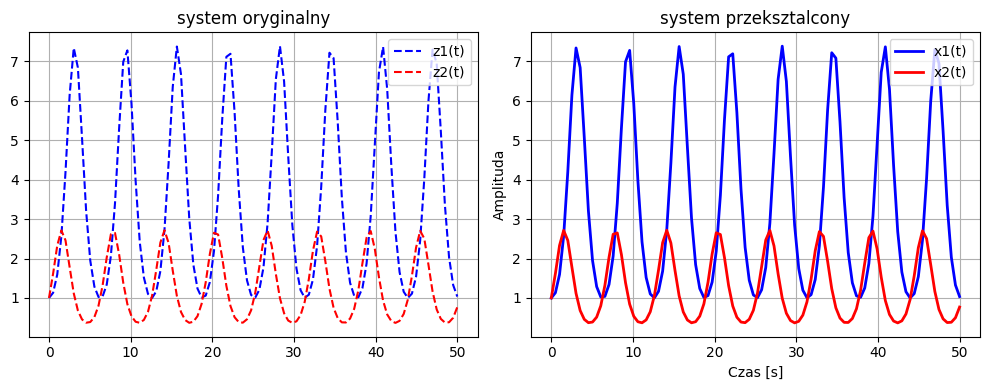

In [16]:
x1_inv = np.exp(x1)
x2_inv = np.exp(x2)

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(t, x1_inv, label='x1(t)', color='blue', linewidth=2)
ax1.plot(t, x2_inv, label='x2(t)', color='red', linewidth=2)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
ax1.set_title('system przeksztalcony')
ax1.grid(True)
ax1.legend()

ax2.plot(t, z1, label='z1(t)', color='blue', linestyle='--')
ax2.plot(t, z2, label='z2(t)', color='red', linestyle='--')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
ax2.set_title('system oryginalny')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

zadanie 5.1


In [17]:
def model_wahadlo(theta, t):
    l = 1
    m = 9
    J = 1
    g = 10

    A = 1.5
    w = 0.65
    R = 1
    d = 0.5
    
    tau = A*np.cos(w*t)

    J = m*R**2

    y = theta[0]
    dydt = theta[1]
    
    dy2dt2 = tau/J - d*dydt/J - m*g*R*np.sin(y)/J
    
    return [dydt, dy2dt2]

zadanie 5.2


zadanie 5.3


zadanie 6.1


zadanie 6.2
